# 1.读取数据集并观察数据信息

In [1]:
import pandas as pd
data = pd.read_csv('mushrooms.csv')

data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

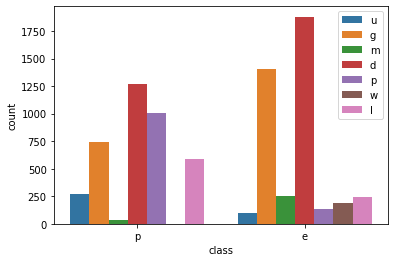

In [4]:
#观察不同蘑菇在各个地方的生长情况
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
sns.countplot(x='class',data=data,hue='habitat',order=list('pe'))
plt.legend(loc='upper right')

# 2.数据预处理

In [5]:
col = data.columns
for i in col:
    print(data[i].unique())
#data['class'].unique()

['p' 'e']
['x' 'b' 's' 'f' 'k' 'c']
['s' 'y' 'f' 'g']
['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
['t' 'f']
['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
['f' 'a']
['c' 'w']
['n' 'b']
['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
['e' 't']
['e' 'c' 'b' 'r' '?']
['s' 'f' 'k' 'y']
['s' 'f' 'y' 'k']
['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
['p']
['w' 'n' 'o' 'y']
['o' 't' 'n']
['p' 'e' 'l' 'f' 'n']
['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
['s' 'n' 'a' 'v' 'y' 'c']
['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [6]:
for i in col:#遍历改变数据类型,将字符串改为数值型
    typ = data[i].unique()
    dic = dict()
    for k in range(len(typ)):
        dic[typ[k]] = k
    data[i] = data[i].map(dic)

In [76]:
data1 = data.drop(['veil-type'],axis=1)
data1.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
2,1,1,0,2,0,2,0,0,1,1,...,0,0,0,0,0,0,0,1,1,2
3,0,0,1,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,3,1,3,0,1,1,0,...,0,0,0,0,0,0,1,1,2,1


# 3.划分数据集和训练集

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
#训练集和测试集划分
x = data1.drop("class",axis=1)
y = data1["class"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [78]:
#定义一个模型评估函数
def evaluate(method,y_test,y_pred):
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    print("the acc of %s is %.5f"%(method,accuracy_score(y_test,y_pred)))

In [79]:
x_train.shape

(6499, 21)

In [80]:
y_train.shape

(6499,)

In [81]:
import numpy as np
X = pd.concat([x_train,y_train],axis=1)
T = pd.concat([x_test,y_test],axis=1)
T.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
606,0,0,3,1,3,0,1,1,1,1,...,1,0,0,0,0,1,1,0,1,1
3783,3,2,3,1,4,0,0,1,2,0,...,3,2,3,0,0,2,3,3,3,0
7701,3,0,0,1,3,1,0,1,10,0,...,0,6,7,2,0,0,8,3,6,1
4202,0,2,1,1,4,0,0,1,2,0,...,3,4,3,0,0,2,3,3,1,0
6956,4,0,4,1,7,0,0,0,8,1,...,3,0,0,0,0,1,4,3,6,0


In [82]:
(m,d) = T.drop(['class'],axis=1).shape
print('d=%d,m=%d'%(d,m))#d为特征数，m为样本量
c=2
X.shape

d=21,m=1625


(6499, 22)

In [86]:
S = np.zeros((d,d))#21*21
mu = np.zeros((d,c))#21*2
for i in range(0,c):
    mu[:,i] = np.mean((X[X['class']==i].drop(['class'],axis=1)).T,1)
    S += np.cov((X[X['class']==i].drop(['class'],axis=1)).T)/c#S的维度（21，21）
    
h = np.dot(np.linalg.inv(S),mu)#21*2

In [115]:
m = [0]*2
for i in range(0,c):
    m[i] = T[T['class']==i].shape[0]
print(m)

[765, 860]


In [125]:
C = np.zeros((c,c))
for k in range(0,2):
    p = np.zeros((c,m[k],c))
    p[:,:,k] = np.dot(h.T,(T[T['class']==k].drop(['class'],axis=1)).T)-np.tile(sum(np.multiply(mu,h)).reshape(2,1),(1,m[k]))/2
    P = p.argmax(axis=0)
    #for i in range(c):
    for j in range(c):
        C[k,j] = np.sum(P[:,k]==j)
print(C)

[[744.  21.]
 [ 45. 815.]]


# 4.数据标准化

In [ ]:
from sklearn import preprocessing#进行z-score标准化
import numpy as np

x_train = preprocessing.scale(x_train)
x_test = preprocessing.scale(x_test)

In [ ]:
from numpy.linalg import pinv
def FDA_train(x_1,x_2):
    n_1, d_1 = np.shape(x_1)
    n_2, d_2 = np.shape(x_2)
    m_1 = np.mean(x_1,axis = 0) 
    m_2 = np.mean(x_2,axis = 0)

    S_1 = np.zeros((d_1,d_1))
    for i in range(n_1):
        S_1 += np.mat(x_1[i] - m_1).T * np.mat(x_1[i] - m_1)

    S_2 = np.zeros((d_2,d_2))
    for i in range(n_2):
        S_2 += np.mat(x_2[i] - m_2).T * np.mat(x_2[i] - m_2)

    S_w = S_1 + S_2

    w_star = pinv(S_w) * np.mat(m_1 - m_2).T

    y_1 = np.mat(x_1) * w_star
    y_2 = np.mat(x_2) * w_star
    m_1_tilde = y_1.sum() / float(n_1)
    m_2_tilde = y_2.sum() / float(n_2)
    w_0 = -(m_1_tilde + m_2_tilde) / float(2)
    return w_star,w_0

def FDA_test(x_test, w_star, w_0):
    y_proj = x_test * w_star
    y_1 = y_proj >= w_0
    y_2 = y_proj < w_0
    y_pred = np.hstack((y_1,y_2)).astype(int)
    return y_pred

In [27]:
c = 2
m=1
d = y.shape[0]
print(d)
import numpy as np

8124


In [29]:
S = np.zeros((8124,8124))
mu = np.zeros((d,c))
for i in range(0,c):
    mu[i] = np.mean(x[:,i],1)
    S+=np.cov(x[:,i])/c           #S的维度（256，256）
h = np.dot(np.linalg.inv(S),mu)     #256*256

TypeError: '(slice(None, None, None), 0)' is an invalid key